In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive

In [3]:
drive.mount(r'/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
churn_data=pandas.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Customer+churn+files.zip (Unzipped Files)/Notebook/Churn Modeling.csv')

In [5]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
labels='Exited(Churned)','Retained'

In [10]:
sizes=[churn_data.Exited[churn_data['Exited']==1].count(),churn_data.Exited[churn_data['Exited']==0].count()]

In [11]:
sizes

[2037, 7963]

In [12]:
explode=(0,0.1)

Text(0.5, 1.0, 'Proportion of Customer churned and Retained')

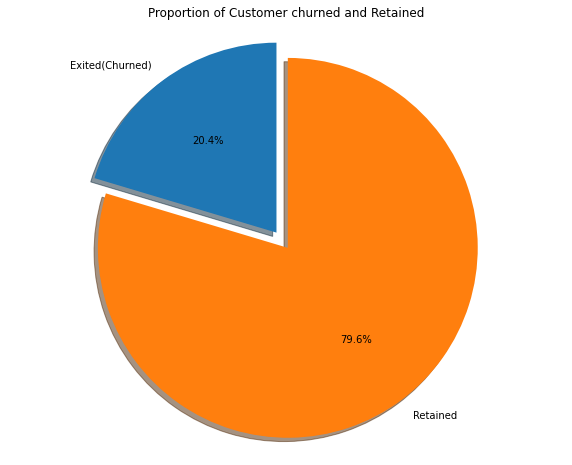

In [13]:
fig1,ax1=plt.subplots(figsize=(10,8))
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')
plt.title('Proportion of Customer churned and Retained')

In [14]:
import seaborn as sns

In [15]:
cat_columns=[column for column in churn_data.columns if churn_data[column].dtype=='O']

In [16]:
cat_columns

['Surname', 'Geography', 'Gender']

In [17]:
from matplotlib import pyplot as plt

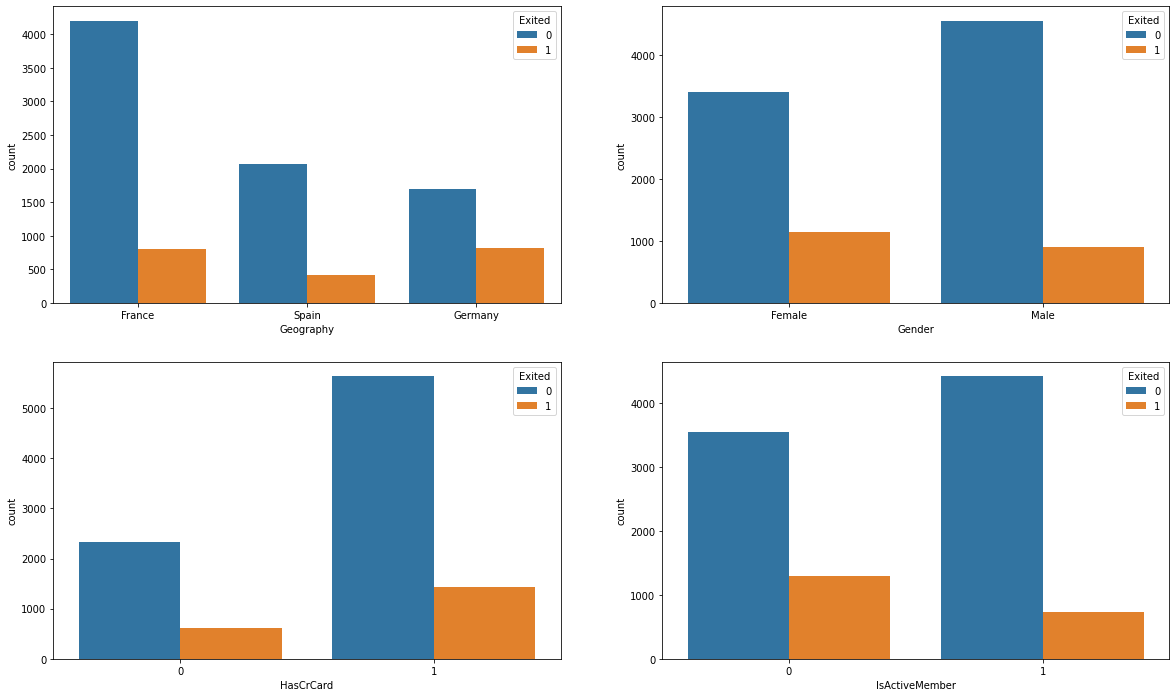

In [18]:
fig2,ax2=plt.subplots(2,2,figsize=(20,12))
sns.countplot(x='Geography',data=churn_data,hue='Exited',ax=ax2[0][0])
sns.countplot(x='Gender',data=churn_data,hue='Exited',ax=ax2[0][1])
sns.countplot(x='HasCrCard',data=churn_data,hue='Exited',ax=ax2[1][0])
sns.countplot(x='IsActiveMember',data=churn_data,hue='Exited',ax=ax2[1][1])
plt.show()

In [19]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


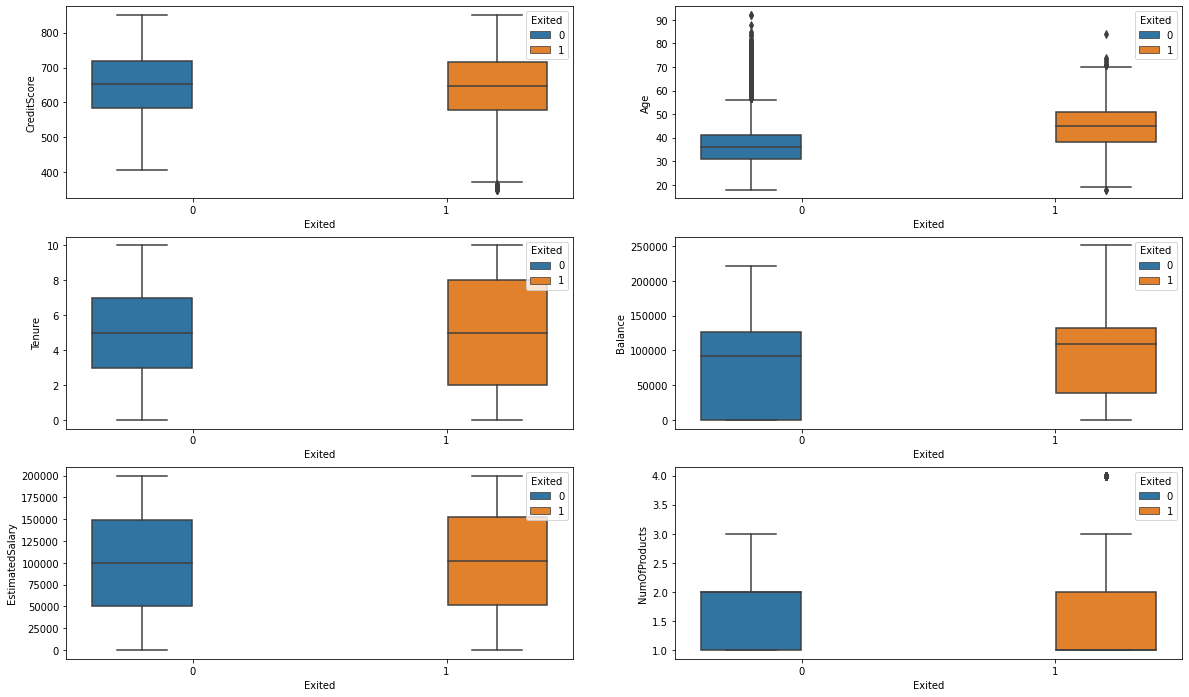

In [20]:
fig3,ax3=plt.subplots(3,2,figsize=(20,12))
sns.boxplot(y='CreditScore',x='Exited',data=churn_data,hue='Exited',ax=ax3[0][0])
sns.boxplot(y='Age',x='Exited',data=churn_data,hue='Exited',ax=ax3[0][1])
sns.boxplot(y='Tenure',x='Exited',data=churn_data,hue='Exited',ax=ax3[1][0])
sns.boxplot(y='Balance',x='Exited',data=churn_data,hue='Exited',ax=ax3[1][1])
sns.boxplot(y='EstimatedSalary',x='Exited',data=churn_data,hue='Exited',ax=ax3[2][0])
sns.boxplot(y='NumOfProducts',x='Exited',data=churn_data,hue='Exited',ax=ax3[2][1])

In [21]:
tenure_no_churn=churn_data.loc[churn_data['Exited']==0].Tenure
tenure_yes_churn=churn_data.loc[churn_data['Exited']==1].Tenure

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


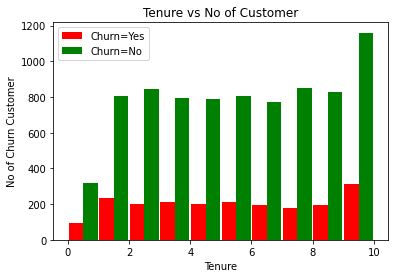

In [22]:
plt.xlabel('Tenure')
plt.ylabel('No of Churn Customer')
plt.title('Tenure vs No of Customer')
plt.hist([tenure_yes_churn,tenure_no_churn],rwidth=0.95,color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

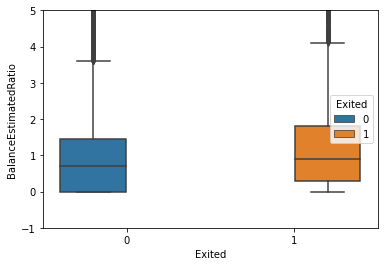

In [23]:
churn_data['BalanceEstimatedRatio']=churn_data['Balance']/churn_data['EstimatedSalary']
sns.boxplot(y='BalanceEstimatedRatio',x='Exited',data=churn_data,hue='Exited')
plt.ylim(-1,5)
plt.show()

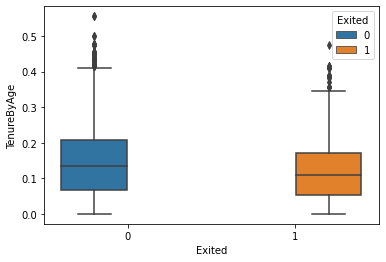

In [24]:
churn_data['TenureByAge']=churn_data.Tenure/churn_data.Age
sns.boxplot(y='TenureByAge',x='Exited',data=churn_data,hue='Exited')
plt.show()

In [32]:
cat_columns=[column for column in churn_data.columns if churn_data[column].dtype=='O']

In [33]:
cat_columns

['Surname', 'Geography', 'Gender']

In [34]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceEstimatedRatio,TenureByAge
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512


In [36]:
churn_data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [37]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceEstimatedRatio,TenureByAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512


In [43]:
churn_data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [44]:
churn_data['Gender']=churn_data['Gender'].map({'Male':1,'Female':0})

In [45]:
churn_data['Gender'].unique()

array([0, 1])

In [46]:
churn_data=pandas.get_dummies(churn_data,columns=['Geography'])

In [47]:
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceEstimatedRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1


In [48]:
Num_columns=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler=MinMaxScaler()

In [51]:
churn_data[Num_columns]=scaler.fit_transform(churn_data[Num_columns])

In [52]:
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceEstimatedRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X=churn_data.drop('Exited',axis=1)
y=churn_data['Exited']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [56]:
#Model Building

In [71]:
import tensorflow as tf
from tensorflow import keras

In [80]:
model=keras.Sequential()

In [81]:
model.add(keras.layers.Dense(12,input_shape=(X_train.shape[1],),activation='relu'))
model.add(keras.layers.Dense(6,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [82]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 12)                180       
                                                                 
 dense_20 (Dense)            (None, 6)                 78        
                                                                 
 dense_21 (Dense)            (None, 1)                 7         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5824 - accuracy: 0.7699
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.7924
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7970
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.8034
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.8076
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.8062
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8071
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.8117
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4326 - accura

In [85]:
y_preds=model.predict(X_test)

In [87]:
y_preds

array([[0.03818816],
       [0.07838535],
       [0.0630272 ],
       ...,
       [0.01897421],
       [0.01848668],
       [0.07641643]], dtype=float32)

In [88]:
y_preds_result=[]
for value in y_preds:
  if value>0.5:
    y_preds_result.append(1)
  else:
    y_preds_result.append(0)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test,y_preds_result)

0.85

In [92]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test,y_preds_result))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.71      0.44      0.54       405

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
cm=confusion_matrix(y_test,y_preds_result)

Text(24.0, 0.5, 'Actual')

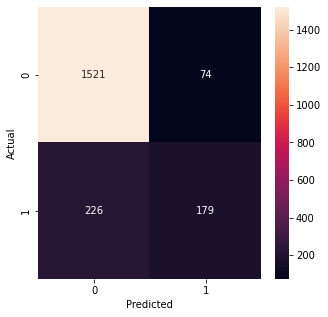

In [99]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')